In [2]:
import sys
sys.path.append("../")

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import *
from plot_skylocs import LimitPlot
import healpy as hp
%matplotlib inline
%load_ext autoreload
%autoreload 2

plots_dir = '/tigress/nrodd/DM-Catalog-Scan/Scan-Small-ROI/plots/'

In [3]:
plots_dir = '/tigress/nrodd/DM-Catalog-Scan/Scan-Small-ROI/plots/'

# 10 GeV

In [37]:
nmc = 1

xsec_max_ary = np.zeros((5,nmc))
limit_ary = np.zeros((5,nmc))
max_TS_ary = np.zeros((5,nmc))

for idm, dm in enumerate(tqdm_notebook([5,7,9,11,13])):
    plot_mc = LimitPlot(data_dir='/tigress/nrodd/DM-Catalog-Scan/Scan-Small-ROI/data/Tully_p8_injsig10' + str(dm)+'/',
                        elephant=True, 
                        nmc=nmc, 
                        halos_ran=1000, 
                        halos_to_keep=1000,
                        data_type="mc",
                        bcut=20,
                        nonoverlap=True,
                        nonoverlapradius=2.,
                        cut_0p5=False,
                        xsecslim=10,
                        TS100=9,
                        TS1000=9,
                        elephantm = [0],
                         file_prefix='LL2_TSmx_lim_b_emin4_emax30_o',
                        catalog_file="/tigress/nrodd/DM-Catalog-Scan/DataFiles/Catalogs/2MRSLocalTully_ALL_DATAPAPER_Planck15_v7.csv",
                        skip_halos=[0]) # 0 for 10 GeV
    limit_ary_temp, xsec_max_ary_temp, maxTS_ary_temp = plot_mc.return_limits()
    
    xsec_max_ary[idm] = xsec_max_ary_temp[-1,0,:]
    limit_ary[idm] = limit_ary_temp[-1,0,:]
    max_TS_ary[idm] = maxTS_ary_temp[-1,0,:]

In [38]:
# from scipy.interpolate import interp1d
# interp1d(np.arange(-23,-28,-1)[1:][::-1],  max_TS[1][1:][::-1])(-24.85)

In [39]:
xsec_max = np.log10(np.percentile(xsec_max_ary[:10], [16,50,84], axis=1))
lims = np.log10(np.percentile(10**limit_ary[:10], [16,50,84], axis=1))

In [40]:
10**xsec_max[1]

array([  7.94328235e-24,   8.91250938e-25,   3.98107171e-26,
         3.54813389e-32,   1.00000000e-33])

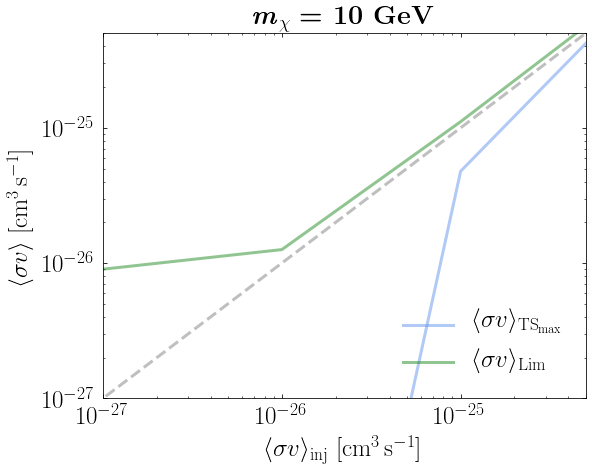

In [41]:
plot_h = 10/1.2
plot_w = 8/1.2

fig, ax = plt.subplots(1, figsize=(plot_h, plot_w))
plt.plot(np.logspace(-23,-27,5),  1.2*10**xsec_max[1], label='$\langle \sigma v \\rangle_{\mathrm{TS}_\mathrm{max}}$',lw=3,alpha=0.5)
# plt.fill_between(np.logspace(-23,-27,5),  10**xsec_max[0], 10**xsec_max[2], alpha=0.2)
plt.plot(np.logspace(-23,-27,5),  1.2*10**lims[1], label='$\langle \sigma v \\rangle_{\mathrm{Lim}}$',lw=3,alpha=0.5)
# plt.fill_between(np.logspace(-23,-27,5),  10**lims[0], 10**lims[2], alpha=0.2)
plt.plot(np.logspace(-28,-21),np.logspace(-28,-21),ls='--', color='grey',lw=3,alpha=0.5)


plt.xlabel("$\langle \sigma v \\rangle_\mathrm{inj}$ [cm$^3$\,s$^{-1}$]", fontsize=25)
plt.ylabel("$\langle \sigma v \\rangle}$ [cm$^3$\,s$^{-1}$]", fontsize=25)

plt.xticks(fontsize=25);
plt.yticks(fontsize=25);

plt.ylim(10**-27.,(5e-25))
plt.xlim(10**-27.,(5e-25))
plt.yscale("log")
plt.xscale("log")

plt.legend(ncol=1,fancybox=True,facecolor='none',frameon=False, loc='lower right', fontsize=25)
plt.title("\\textbf{\emph{m}}$\mathbf{_\chi}$ \\textbf{= 10 GeV}", fontsize=27)

plt.tight_layout()
plt.savefig(plots_dir + "signal_recovery_10GeV.pdf")
plt.show()

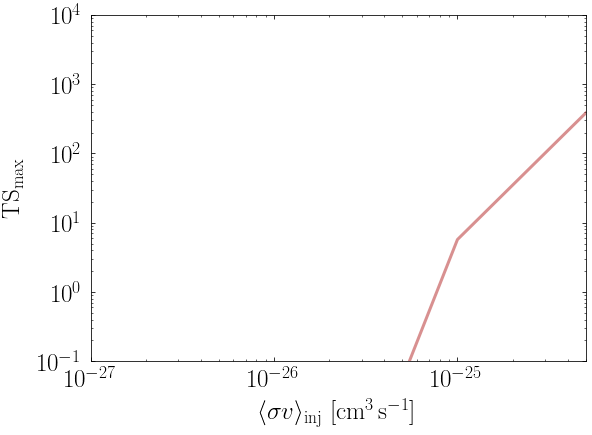

In [42]:
plot_h = 10/1.2
plot_w = 8/1.3

fig, ax = plt.subplots(1, figsize=(plot_h, plot_w))

max_TS = (np.percentile(max_TS_ary, [16,50,84], axis=1))
plt.plot(np.logspace(-23,-27,5),  max_TS[1], label='TS$_\mathrm{max}$',alpha=0.5, lw=3, color='firebrick')
plt.xlabel("$\langle \sigma v \\rangle_\mathrm{inj}$ [cm$^3$\,s$^{-1}$]",fontsize=25)
plt.ylabel('TS$_\mathrm{max}$',fontsize=25)
plt.xlim(-27.5,np.log10(5e-25))
plt.yscale("log")

plt.xticks(fontsize=25);
plt.yticks(fontsize=25);

plt.xlim(10**-27.,(5e-25))
plt.xscale("log")
plt.ylim(0.1,10000)
plt.tight_layout()
plt.savefig(plots_dir + 'injsig_maxTS10GeV.pdf',bbox_inches='tight')
plt.show()

# 100 GeV

In [52]:
nmc = 1

xsec_max_ary = np.zeros((5,nmc))
limit_ary = np.zeros((5,nmc))
max_TS_ary = np.zeros((5,nmc))

for idm, dm in enumerate(tqdm_notebook([3,5,7,9,11])):
#     if idm != 5: continue
    plot_mc = LimitPlot(data_dir='/tigress/nrodd/DM-Catalog-Scan/Scan-Small-ROI/data/Tully_p8_injsig' + str(dm)+'/',
                        elephant=True, 
                        nmc=nmc, 
                        halos_ran=1000, 
                        halos_to_keep=1000,
                        data_type="mc",
                        bcut=20,
                        nonoverlap=True,
                        nonoverlapradius=2.,
                        cut_0p5=False,
                        xsecslim=10,
                        TS100=9,
                        TS1000=9,
                        file_prefix='LL2_TSmx_lim_b_emin4_emax30_o',
                        elephantm = [11], # 11 for 10 GeV
                        catalog_file="/tigress/nrodd/DM-Catalog-Scan/DataFiles/Catalogs/2MRSLocalTully_ALL_DATAPAPER_Planck15_v7.csv",
                        skip_halos=[0])
    limit_ary_temp, xsec_max_ary_temp, maxTS_ary_temp = plot_mc.return_limits()
    
    xsec_max_ary[idm] = xsec_max_ary_temp[-1,11,:]
    limit_ary[idm] = limit_ary_temp[-1,11,:]
    max_TS_ary[idm] = maxTS_ary_temp[-1,11,:]

In [57]:
# plot_data = LimitPlot(data_dir='/tigress/nrodd/DM-Catalog-Scan/Scan-Small-ROI/data/Tully_p8_injsig13///',
#                         elephant=True, 
#                         nmc=1,
#                         bcut=20,
#                         nonoverlap=True,
#                         nonoverlapradius=2.,
#                         cut_0p5=False,
#                         xsecslim=10,
#                         TS100=9,
#                         TS1000=9,
#                         halos_ran=1000, 
#                         halos_to_keep=1000,
#                         data_type="mc",
#                         catalog_file="/tigress/nrodd/DM-Catalog-Scan/DataFiles/Catalogs/2MRSLocalTully_ALL_DATAPAPER_Planck15_v7.csv",
#                          file_prefix='LL2_TSmx_lim_b_emin4_emax30_o',
#                         elephantm = [11], # 11 for 10 GeV
#                         skip_halos=[0])


# data_ary, _, maxTS_ary = plot_data.return_limits()

In [58]:
xsec_max = np.log10(np.percentile(xsec_max_ary[:10], [16,50,84], axis=1))
lims = np.log10(np.percentile(10**limit_ary[:10], [16,50,84], axis=1))

# plt.plot(np.arange(-22,-27,-1),  xsec_max[1], label='maxTS')
# plt.fill_between(np.arange(-22,-27,-1),  xsec_max[0], xsec_max[2], alpha=0.2)
# plt.plot(np.arange(-22,-27,-1),  lims[1], label='Limit')
# plt.fill_between(np.arange(-22,-27,-1),  lims[0], lims[2], alpha=0.2)
# plt.plot([-28,-21],[-28,-21],ls='--', color='grey')
# plt.xlabel("$\langle \sigma v \\rangle_\mathrm{inj}$ [cm$^3$s$^{-1}$]")
# plt.ylabel("$\langle \sigma v \\rangle_\mathrm{rec}$ [cm$^3$s$^{-1}$]")
# plt.ylim(-26.5,-21.5)
# plt.xlim(-26.5,-21.5)
# plt.legend()
# plt.savefig(plots_dir + 'injsiglim100GeV.pdf',bbox_inches='tight')
# plt.show()

# max_TS = np.log10(np.percentile(10**max_TS_ary, [16,50,84], axis=1))
# plt.plot(np.arange(-22,-27,-1),  max_TS[1], label='max TS')
# plt.xlabel("$\langle \sigma v \\rangle_\mathrm{inj}$ [cm$^3$s$^{-1}$]")
# plt.ylabel("Max TS")
# plt.xlim(-26.5,-21.5)
# # plt.savefig(plots_dir + 'injsigmaxTS100GeV.pdf',bbox_inches='tight')
# plt.show()

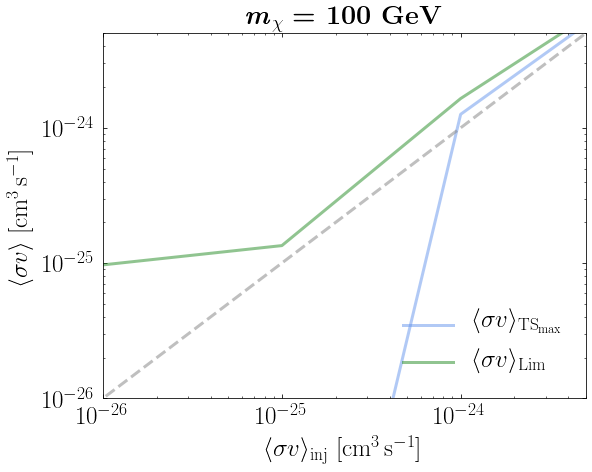

In [59]:
plot_h = 10/1.2
plot_w = 8/1.2

fig, ax = plt.subplots(1, figsize=(plot_h, plot_w))
plt.plot(np.logspace(-22,-26,5),  10**xsec_max[1], label='$\langle \sigma v \\rangle_{\mathrm{TS}_\mathrm{max}}$',lw=3,alpha=0.5)
# plt.fill_between(np.logspace(-22,-26,5),  10**xsec_max[0], 10**xsec_max[2], alpha=0.2)
plt.plot(np.logspace(-22,-26,5),  10**lims[1], label='$\langle \sigma v \\rangle_{\mathrm{Lim}}$',lw=3,alpha=0.5)
# plt.fill_between(np.logspace(-22,-26,5),  10**lims[0], 10**lims[2], alpha=0.2)
plt.plot(np.logspace(-28,-21),np.logspace(-28,-21),ls='--', color='grey',lw=3,alpha=0.5)


plt.xlabel("$\langle \sigma v \\rangle_\mathrm{inj}$ [cm$^3$\,s$^{-1}$]", fontsize=25)
plt.ylabel("$\langle \sigma v \\rangle}$ [cm$^3$\,s$^{-1}$]", fontsize=25)

plt.xticks(fontsize=25);
plt.yticks(fontsize=25);

plt.ylim(10**-26.,(5e-24))
plt.xlim(10**-26.,(5e-24))
plt.yscale("log")
plt.xscale("log")

plt.legend(ncol=1,fancybox=True,facecolor='none',frameon=False, loc='lower right', fontsize=25)
plt.title("\\textbf{\emph{m}}$\mathbf{_\chi}$ \\textbf{= 100 GeV}", fontsize=27)

plt.tight_layout()
plt.savefig(plots_dir + "signal_recovery_100GeV.pdf")
plt.show()

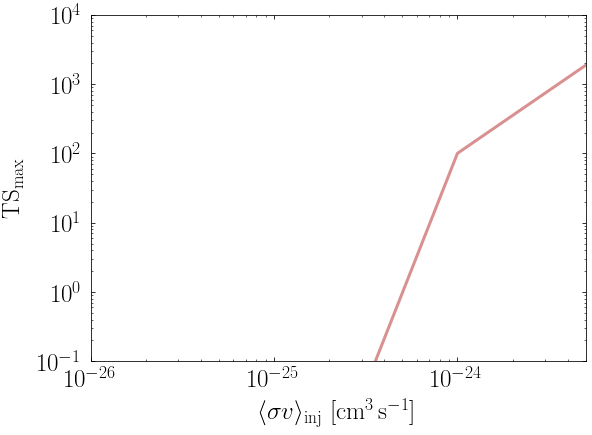

In [61]:
plot_h = 10/1.2
plot_w = 8/1.3

fig, ax = plt.subplots(1, figsize=(plot_h, plot_w))

max_TS = (np.percentile(max_TS_ary, [16,50,84], axis=1))
plt.plot(np.logspace(-22,-26,5),  max_TS[1], label='TS$_\mathrm{max}$',alpha=0.5, lw=3, color='firebrick')
plt.xlabel("$\langle \sigma v \\rangle_\mathrm{inj}$ [cm$^3$\,s$^{-1}$]",fontsize=25)
plt.ylabel('TS$_\mathrm{max}$',fontsize=25)
plt.xlim(-27.5,np.log10(5e-25))
plt.yscale("log")

plt.xticks(fontsize=25);
plt.yticks(fontsize=25);

plt.xlim(10**-26.,(5e-24))
plt.xscale("log")

plt.ylim(1e-1,1e4)
plt.tight_layout()
plt.savefig(plots_dir + 'injsig_maxTS100GeV.pdf',bbox_inches='tight')
plt.show()

# 10 TeV

In [48]:
nmc = 1

xsec_max_ary = np.zeros((5,nmc))
limit_ary = np.zeros((5,nmc))
max_TS_ary = np.zeros((5,nmc))

for idm, dm in enumerate(tqdm_notebook([1,3,5,7,9])):
    plot_mc = LimitPlot(data_dir='/tigress/nrodd/DM-Catalog-Scan/Scan-Small-ROI/data/Tully_injsig10000' + str(dm)+'/',
                        elephant=True, 
                        nmc=nmc, 
                        halos_ran=600, 
                        halos_to_keep=600,
                        data_type="mc",
                        bcut=20,
                        nonoverlap=True,
                        nonoverlapradius=2.,
                        cut_0p5=False,
                        xsecslim=10,
                        TS100=9,
                        TS1000=9,
                        elephantm = [52], # 52 for 10 TeV
                         file_prefix='LL2_TSmx_lim_b_emin4_emax30_o',
                        skip_halos=[0])
    limit_ary_temp, xsec_max_ary_temp, maxTS_ary_temp = plot_mc.return_limits()
    
    xsec_max_ary[idm] = xsec_max_ary_temp[-1,52,:]
    limit_ary[idm] = limit_ary_temp[-1,52,:]
    max_TS_ary[idm] = maxTS_ary_temp[-1,52,:]

In [49]:
xsec_max = np.log10(np.percentile(xsec_max_ary[:10], [16,50,84], axis=1))
lims = np.log10(np.percentile(10**limit_ary[:10], [16,50,84], axis=1))

# plt.plot(np.arange(-21,-26,-1),  xsec_max[1], label='maxTS')
# plt.fill_between(np.arange(-21,-26,-1),  xsec_max[0], xsec_max[2], alpha=0.2)
# plt.plot(np.arange(-21,-26,-1),  lims[1], label='Limit')
# plt.fill_between(np.arange(-21,-26,-1),  lims[0], lims[2], alpha=0.2)
# plt.plot([-27,-20],[-27,-20],ls='--', color='grey')
# plt.xlabel("$\langle \sigma v \\rangle_\mathrm{inj}$ [cm$^3$s$^{-1}$]")
# plt.ylabel("$\langle \sigma v \\rangle_\mathrm{rec}$ [cm$^3$s$^{-1}$]")
# plt.ylim(-25.5,-20.5)
# plt.xlim(-25.5,-20.5)
# plt.legend()
# # plt.savefig(plots_dir + 'injsiglim10TeV.pdf',bbox_inches='tight')
# plt.show()

# max_TS = np.log10(np.percentile(10**max_TS_ary, [16,50,84], axis=1))
# plt.plot(np.arange(-21,-26,-1),  max_TS[1], label='max TS')
# plt.xlabel("$\langle \sigma v \\rangle_\mathrm{inj}$ [cm$^3$s$^{-1}$]")
# plt.ylabel("Max TS")
# plt.xlim(-25.5,-20.5)
# # plt.savefig(plots_dir + 'injsigmaxTS10TeV.pdf',bbox_inches='tight')
# plt.show()

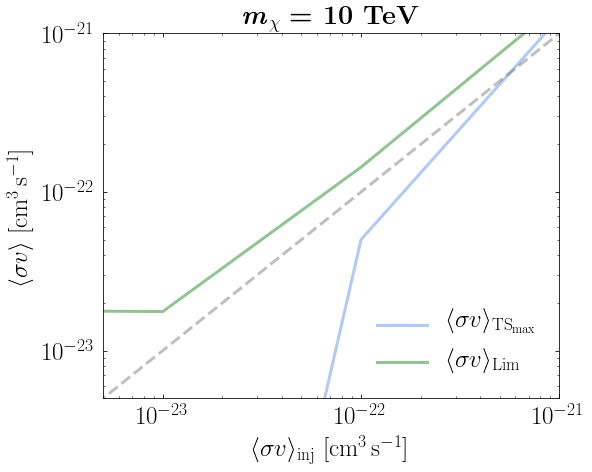

In [50]:
plot_h = 10/1.2
plot_w = 8/1.2

fig, ax = plt.subplots(1, figsize=(plot_h, plot_w))
plt.plot(np.logspace(-21,-25,5),  10**xsec_max[1], label='$\langle \sigma v \\rangle_{\mathrm{TS}_\mathrm{max}}$',lw=3,alpha=0.5)
# plt.fill_between(np.logspace(-22,-26,5),  10**xsec_max[0], 10**xsec_max[2], alpha=0.2)
plt.plot(np.logspace(-21,-25,5),  10**lims[1], label='$\langle \sigma v \\rangle_{\mathrm{Lim}}$',lw=3,alpha=0.5)
# plt.fill_between(np.logspace(-22,-26,5),  10**lims[0], 10**lims[2], alpha=0.2)
plt.plot(np.logspace(-28,-21),np.logspace(-28,-21),ls='--', color='grey',lw=3,alpha=0.5)


plt.xlabel("$\langle \sigma v \\rangle_\mathrm{inj}$ [cm$^3$\,s$^{-1}$]", fontsize=25)
plt.ylabel("$\langle \sigma v \\rangle}$ [cm$^3$\,s$^{-1}$]", fontsize=25)

plt.xticks(fontsize=25);
plt.yticks(fontsize=25);

plt.ylim(5*10**-24.,(1e-21))
plt.xlim(5*10**-24.,(1e-21))
plt.yscale("log")
plt.xscale("log")

plt.legend(ncol=1,fancybox=True,facecolor='none',frameon=False, loc='lower right', fontsize=25)
plt.title("\\textbf{\emph{m}}$\mathbf{_\chi}$ \\textbf{= 10 TeV}", fontsize=27)

plt.tight_layout()
plt.savefig(plots_dir + "signal_recovery_10TeV.pdf")
plt.show()

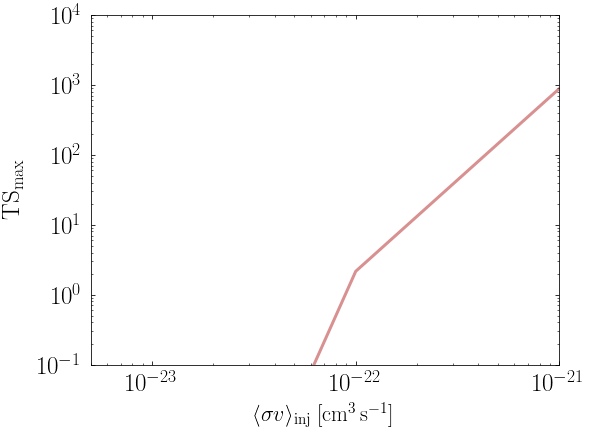

In [51]:
plot_h = 10/1.2
plot_w = 8/1.3

fig, ax = plt.subplots(1, figsize=(plot_h, plot_w))

max_TS = (np.percentile(max_TS_ary, [16,50,84], axis=1))
plt.plot(np.logspace(-21,-25,5),  max_TS[1], label='TS$_\mathrm{max}$',alpha=0.5, lw=3, color='firebrick')
plt.xlabel("$\langle \sigma v \\rangle_\mathrm{inj}$ [cm$^3$\,s$^{-1}$]")
plt.ylabel('TS$_\mathrm{max}$',fontsize=25)
plt.yscale("log")

plt.xticks(fontsize=25);
plt.yticks(fontsize=25);

plt.xlim(5*10**-24.,(1e-21))
plt.xscale("log")

plt.ylim(1e-1,1e4)

plt.tight_layout()
plt.savefig(plots_dir + 'injsig_maxTS10TeV.pdf',bbox_inches='tight')
plt.show()